In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"train.csv")

In [3]:
desc = df.describe().round(1).loc['min']

In [4]:
neg_desc = desc[desc<0]

In [5]:
neg_desc

Aspect                                -33.0
Slope                                  -3.0
Horizontal_Distance_To_Hydrology      -92.0
Vertical_Distance_To_Hydrology       -317.0
Horizontal_Distance_To_Roadways      -287.0
Hillshade_9am                          -4.0
Hillshade_3pm                         -53.0
Horizontal_Distance_To_Fire_Points   -277.0
Name: min, dtype: float64

In [6]:
neg_columns = list(neg_desc.index)

In [7]:
neg_df = df[df.columns.intersection(neg_columns)]

In [8]:
from pandas_profiling import ProfileReport
prof = ProfileReport(neg_df, minimal=True)

In [9]:
neg_df

,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,40,8,30,13,3270,206,193,4873
1,182,5,280,29,3270,233,106,5423
2,13,7,351,37,2914,208,137,5269
3,276,13,192,16,3034,207,156,2866
4,186,13,266,22,2916,231,154,2642
...,...,...,...,...,...,...,...,...
3999995,34,25,51,65,6314,240,103,1618
3999996,104,8,696,83,5427,210,150,2863
3999997,144,1,509,58,4820,195,91,92
3999998,178,17,376,86,2592,225,39,1374


In [10]:
#prof

In [11]:
df[df < 0] = 0

In [12]:
#df = df_org[df_org['Cover_Type'] <=2]

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
X['Wilderness_Summed'] = df.iloc[:,df.columns.str.contains('Wild')].sum(axis = 1)
X['Soil_Summed'] = df.iloc[:,df.columns.str.contains('Soil')].sum(axis = 1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.33, random_state=42)

In [16]:
#https://stackoverflow.com/questions/32982034/which-columns-are-binary-in-a-pandas-dataframe
binary_columns = [col for col in X_train if np.isin(X_train[col].dropna().unique(), [0, 1]).all()]
non_bin_df = X_train[[c for c in X_train.columns if c not in binary_columns]]
non_bin_df['Target'] = y_train

C:\Users\Mark\AppData\Local\Temp/ipykernel_16000/110311032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_bin_df['Target'] = y_train


In [17]:
import seaborn as sns
corr = non_bin_df.corr()
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

In [18]:
corr['Target'].abs().sort_values(ascending = False)

Target                                1.000000
Elevation                             0.395380
Horizontal_Distance_To_Roadways       0.094368
Soil_Summed                           0.083320
Horizontal_Distance_To_Fire_Points    0.070007
Wilderness_Summed                     0.065258
Id                                    0.059905
Vertical_Distance_To_Hydrology        0.032514
Slope                                 0.023600
Horizontal_Distance_To_Hydrology      0.013574
Hillshade_Noon                        0.006995
Hillshade_3pm                         0.004416
Aspect                                0.003089
Hillshade_9am                         0.002169
Name: Target, dtype: float64

In [19]:
(y_train.value_counts() /  y_train.count()).round(2)

2    0.57
1    0.37
3    0.05
7    0.02
6    0.00
4    0.00
5    0.00
Name: Cover_Type, dtype: float64

<AxesSubplot:>

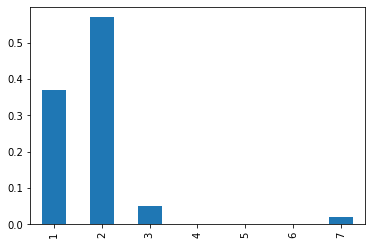

In [20]:
%matplotlib inline
(y_train.value_counts() /  y_train.count()).round(2).sort_index().plot.bar()

### No Missing Values

In [21]:
X_train.isna().sum().sum()

0

In [22]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df, minimal=True)

### Remove

1. Id => constant 0
2. Soil type 7 => constant 0
3. Soil type 15 => constant 0 


In [23]:
#prof

In [23]:
X_train2 = X_train[['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Summed', 'Soil_Summed']].copy()
#X_train2 = X_train

In [24]:
X_train2 = X_train.copy()

In [25]:
x_elevation_average = X_train2['Elevation'].mean()

In [26]:
X_train2['Elevation_Flag'] = X_train2['Elevation'].apply(lambda x: 1 if x <= x_elevation_average  else 0)

In [27]:
X_train2

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Summed,Soil_Summed,Elevation_Flag
3577337,3577337,3165,176,26,198,144,1748,216,241,170,...,0,0,0,0,0,0,0,0,1,0
2921998,2921998,2866,22,20,48,3,57,153,246,177,...,0,0,0,0,0,0,0,1,0,1
2440781,2440781,3237,264,25,35,0,1189,210,244,101,...,0,0,0,0,0,0,0,1,0,0
1123930,1123930,3299,23,4,1147,0,802,217,242,125,...,0,0,0,0,0,0,0,1,0,0
1263431,1263431,3023,109,36,48,5,2351,233,199,222,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356330,2356330,2730,286,9,270,6,1372,203,225,82,...,0,0,0,0,0,0,0,1,0,1
3511566,3511566,3162,116,10,193,38,3513,235,224,151,...,0,0,0,0,0,0,0,0,1,0
2229084,2229084,2321,158,18,213,26,333,222,217,196,...,0,0,0,0,0,0,0,1,2,1
2768307,2768307,2701,337,7,556,48,685,206,185,135,...,0,0,0,0,0,0,0,1,1,1


In [27]:
#X_train2 = X_train2[y_train.isin([1,2,3,7])]

In [28]:
#y_train = y_train[y_train.isin([1,2,3,7])]

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4, random_state=0, n_jobs=-1)
clf.fit(X_train2, y_train)


RandomForestClassifier(max_depth=4, n_jobs=-1, random_state=0)

In [30]:
importances = pd.Series(clf.feature_importances_, index=X_train2.columns)

In [31]:
importances.sort_values(ascending=False).round(3)

Elevation                             0.543
Elevation_Flag                        0.417
Horizontal_Distance_To_Roadways       0.026
Horizontal_Distance_To_Fire_Points    0.006
Wilderness_Summed                     0.005
Soil_Summed                           0.004
dtype: float64

In [35]:
binary_columns

['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [60]:
binary_columns

['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Elevation_Flag']

In [55]:
binary_columns.append('Elevation_Flag')

In [65]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(X_train2, y_train, 
        cat_features=binary_columns, 
        eval_set=(X_train2, y_train), 
        verbose=False
)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

from sklearn.model_selection import cross_val_score
from sklearn import metrics
scores = cross_val_score(
            clf, X_train2, y_train, cv=5, scoring='accuracy', n_jobs=-1)
scores

In [66]:
predicted = clf.predict(X_train2)

In [68]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_train,
                                   predicted,
                                   #labels=X_train.columns,
                                   #target_names=target_names,
                                   output_dict=True)

C:\Users\Mark\Documents\Projects\KagglePlaygroundDec2021\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mark\Documents\Projects\KagglePlaygroundDec2021\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mark\Documents\Projects\KagglePlaygroundDec2021\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [36]:
pd.DataFrame(clf_report).round(3)

,1,2,3,4,5,6,7,accuracy,macro avg,weighted avg
precision,0.856,0.928,0.826,0.0,0.0,0.0,0.0,0.895,0.373,0.879
recall,0.966,0.919,0.434,0.0,0.0,0.0,0.0,0.895,0.331,0.895
f1-score,0.907,0.923,0.569,0.0,0.0,0.0,0.0,0.895,0.343,0.883
support,983836.000,1515485.000,130914.000,253.0,1.0,7722.0,41789.0,0.895,2680000.000,2680000.000


In [69]:
test_csv = pd.read_csv(r"test.csv")

In [70]:
test_csv['Wilderness_Summed'] = test_csv.iloc[:,test_csv.columns.str.contains('Wild')].sum(axis = 1)
test_csv['Soil_Summed'] = test_csv.iloc[:,test_csv.columns.str.contains('Soil')].sum(axis = 1)


test_csv = test_csv[['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Summed', 'Soil_Summed']].copy()
test_csv['Elevation_Flag'] = test_csv['Elevation'].apply(lambda x: 1 if x <= x_elevation_average  else 0)

In [71]:
predicted = clf.predict(test_csv)

CatBoostError: Invalid cat_features[0] = 11 value: index must be < 6.

In [ ]:
output = pd.DataFrame(predicted).reset_index()

In [ ]:
output.columns = ['Id', 'Cover_Type']

In [ ]:
output['Id'] = output['Id'] + 4000000

In [ ]:
output.to_csv("submission.csv", index=False )

In [ ]:
X_test['Wilderness_Summed'] = X_test.iloc[:,X_test.columns.str.contains('Wild')].sum(axis = 1)
X_test['Soil_Summed'] = X_test.iloc[:,X_test.columns.str.contains('Soil')].sum(axis = 1)


X_test = X_test[['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Summed', 'Soil_Summed']].copy()
X_test['Elevation_Flag'] = X_test['Elevation'].apply(lambda x: 1 if x <= x_elevation_average  else 0)

In [ ]:
predicted = clf.predict(X_test)

In [ ]:
clf_report = classification_report(y_test,
                                   predicted,
                                   #labels=X_train.columns,
                                   #target_names=target_names,
                                   output_dict=True)

In [ ]:
pd.DataFrame(clf_report).round(3)

In [ ]:
X_train2.columns

In [ ]:
X_test.columns